In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Dataset
# Make sure your CSV file is named 'emails.csv' and is in the same folder.
try:
    df = pd.read_csv('Phishing_Email.csv')
except FileNotFoundError:
    print("Error: 'Phishing_Email.csv' not found. Please save your data as a CSV file in the correct directory.")
    exit()

# Display the first few rows to confirm it's loaded correctly
print("--- Data Loaded Successfully ---")
print(df.head())
print("\n")


# 2. Prepare the Data
# Define our features (X) and target/label (y)
X = df['Email Text'].fillna('') # Use the text column, fill empty cells with an empty string
y = df['Email Type']           # Use the type column as our label

# Initialize the TF-IDF Vectorizer
# This will convert our text into a matrix of numerical features.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the text data into TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(X)


# 3. Split Data into Training and Testing Sets
# We'll use 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print(f"--- Data Split ---")
print(f"Training set size: {X_train.shape[0]} emails")
print(f"Testing set size: {X_test.shape[0]} emails")
print("\n")


# 4. Train the Classification Model
# We are using Logistic Regression, a reliable and effective model for this task.
model = LogisticRegression()
model.fit(X_train, y_train)
print("--- Model Trained Successfully ---\n")


# 5. Evaluate the Model
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Display a detailed classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


# 6. Use the Model to Classify New Emails
print("\n--- Testing with New Emails ---")

# Example new emails to classify
new_emails = [
    "URGENT: Your account has been compromised. Click here to verify.",
    "re: meeting schedule for next week",
    "Congratulations! You have won a $1,000 gift card. Claim now!",
    "fw: project documents attached"
]

# Convert the new emails into TF-IDF features using the SAME vectorizer
new_emails_tfidf = tfidf_vectorizer.transform(new_emails)

# Predict the category for the new emails
new_predictions = model.predict(new_emails_tfidf)

# Display the results
for email, prediction in zip(new_emails, new_predictions):
    print(f"Email: '{email}'  ->  Predicted: {prediction}")

--- Data Loaded Successfully ---
   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  


--- Data Split ---
Training set size: 14920 emails
Testing set size: 3730 emails


--- Model Trained Successfully ---

Model Accuracy: 0.9788

--- Classification Report ---
                precision    recall  f1-score   support

Phishing Email       0.96      0.99      0.97      1466
    Safe Email       0.99      0.97      0.98      2264

      accuracy                           0.98      3730
     macro avg       0.98      0.98  


--- Generating Visualizations ---
Saved: email_distribution_chart.png


/tmp/ipython-input-1603446682.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Email Type', data=df, palette=['#3498db', '#e74c3c'])


Saved: confusion_matrix.png


/tmp/ipython-input-1603446682.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_phishing, ax=axes[0], palette='Reds_d')
/tmp/ipython-input-1603446682.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_safe, ax=axes[1], palette='Blues_d')


Saved: top_words_chart.png


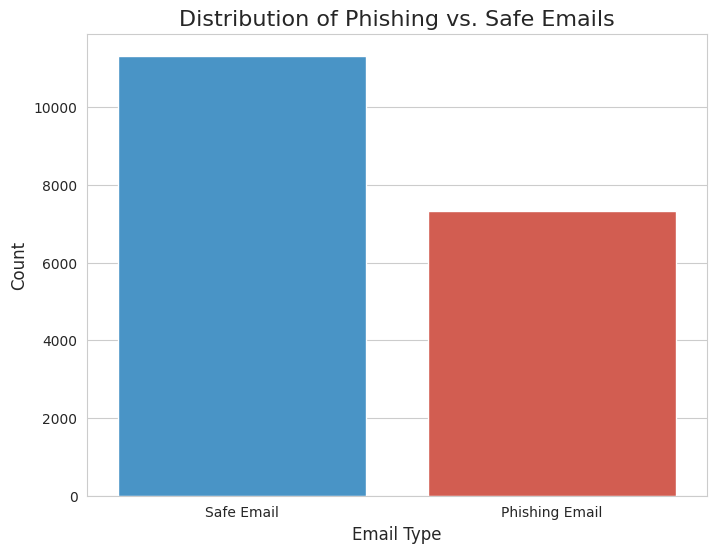

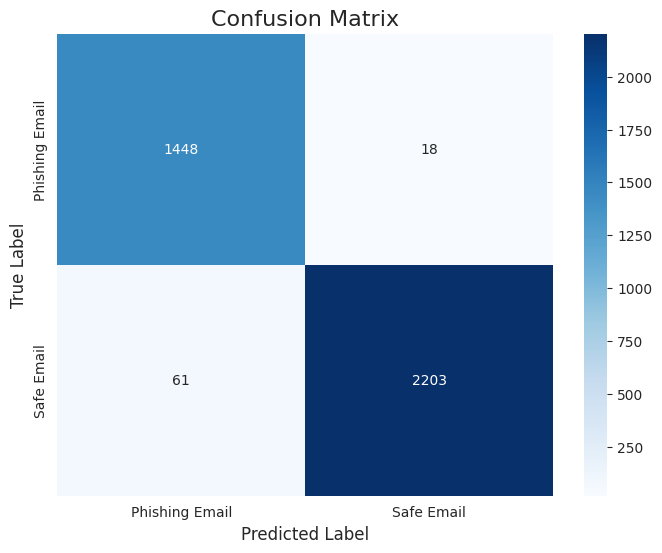

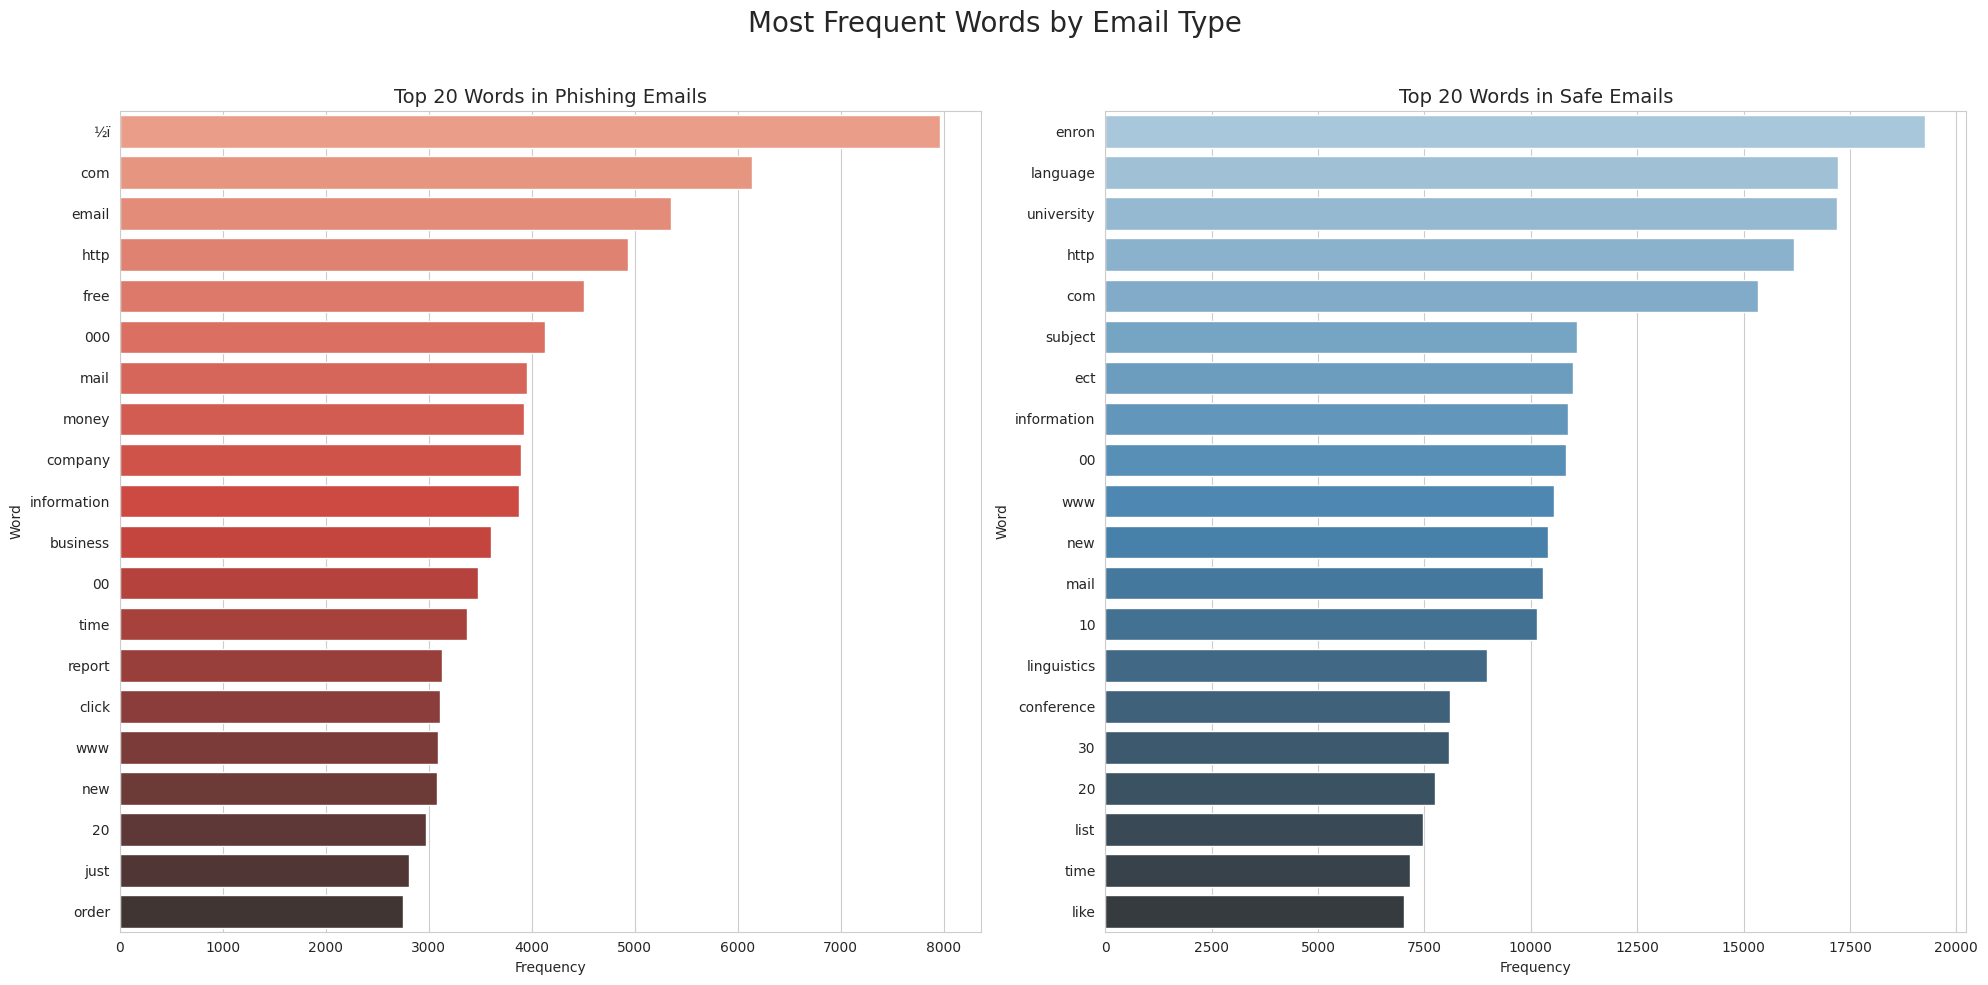

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

# Ensure the plots are displayed nicely
sns.set_style('whitegrid')

print("\n--- Generating Visualizations ---")

# --- 1. Bar Chart: Distribution of Email Types ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Email Type', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Distribution of Phishing vs. Safe Emails', fontsize=16)
plt.xlabel('Email Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('email_distribution_chart.png')
print("Saved: email_distribution_chart.png")


# --- 2. Confusion Matrix ---
# A heatmap to show where the model made correct and incorrect predictions.
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.savefig('confusion_matrix.png')
print("Saved: confusion_matrix.png")


# --- 3. Top Words in Each Category ---
# This helps understand which words are most indicative of each email type.

def get_top_n_words(corpus, n=None):
    """
    Utility function to get the top n words from a list of text.
    """
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 20 words for Phishing emails
# CORRECTED LINE: Added .fillna('') to handle empty rows
phishing_corpus = df[df['Email Type'] == 'Phishing Email']['Email Text'].fillna('')
top_phishing_words = get_top_n_words(phishing_corpus, 20)
df_phishing = pd.DataFrame(top_phishing_words, columns=['Word', 'Frequency'])

# Get top 20 words for Safe emails
# CORRECTED LINE: Added .fillna('') to handle empty rows
safe_corpus = df[df['Email Type'] == 'Safe Email']['Email Text'].fillna('')
top_safe_words = get_top_n_words(safe_corpus, 20)
df_safe = pd.DataFrame(top_safe_words, columns=['Word', 'Frequency'])

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x='Frequency', y='Word', data=df_phishing, ax=axes[0], palette='Reds_d')
axes[0].set_title('Top 20 Words in Phishing Emails', fontsize=14)

sns.barplot(x='Frequency', y='Word', data=df_safe, ax=axes[1], palette='Blues_d')
axes[1].set_title('Top 20 Words in Safe Emails', fontsize=14)

plt.suptitle('Most Frequent Words by Email Type', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('top_words_chart.png')
print("Saved: top_words_chart.png")
plt.show()